In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from scipy.stats import zscore

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Part 1: Importing the Data

In this section of my project, I am importing each csv file for the five companies that are included in the Stock Market data I found on Kaggle. After creating a dataframe for each company, I combined the dataframes into a single dataframe and added a column labeled 'Company' in order to distinguish between the different stock prices. Here is the link for the dataset on Kaggle: https://www.kaggle.com/datasets/soumendraprasad/stock/data

In [9]:
amazon = pd.read_csv('/Users/rachi/OneDrive - Embry-Riddle Aeronautical University/JupyterNotebook/DS 312/Final Project/Amazon.csv')
amazon.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,4.075000,4.478125,3.952344,4.468750,4.468750,322352000,2000-01-03
1,4.268750,4.575000,4.087500,4.096875,4.096875,349748000,2000-01-04
2,3.525000,3.756250,3.400000,3.487500,3.487500,769148000,2000-01-05
3,3.565625,3.634375,3.200000,3.278125,3.278125,375040000,2000-01-06
4,3.350000,3.525000,3.309375,3.478125,3.478125,210108000,2000-01-07


In [10]:
amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5.839000e+03
mean,34.865886,35.280858,34.410312,34.853440,34.853440,1.239786e+08
std,49.577395,50.162208,48.924149,49.540404,49.540404,9.910548e+07
min,0.295500,0.305000,0.275500,0.298500,0.298500,1.762600e+07
25%,2.209188,2.252750,2.175000,2.221500,2.221500,6.798200e+07
50%,9.449500,9.570000,9.285500,9.437500,9.437500,1.015480e+08
75%,47.835499,48.138500,47.507500,47.833000,47.833000,1.479700e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


In [11]:
apple = pd.read_csv('/Users/rachi/OneDrive - Embry-Riddle Aeronautical University/JupyterNotebook/DS 312/Final Project/Apple.csv')
apple.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,0.936384,1.004464,0.907924,0.999442,0.850643,535796800,2000-01-03
1,0.966518,0.987723,0.903460,0.915179,0.778926,512377600,2000-01-04
2,0.926339,0.987165,0.919643,0.928571,0.790324,778321600,2000-01-05
3,0.947545,0.955357,0.848214,0.848214,0.721931,767972800,2000-01-06
4,0.861607,0.901786,0.852679,0.888393,0.756127,460734400,2000-01-07


In [12]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5.839000e+03
mean,30.964461,31.318350,30.619127,30.982545,29.763246,4.112873e+08
std,44.291183,44.842037,43.768914,44.328922,44.158932,3.867277e+08
min,0.231964,0.235536,0.227143,0.234286,0.199405,3.519590e+07
25%,1.931965,1.955714,1.897143,1.925714,1.639011,1.384356e+08
50%,13.321429,13.523214,13.160357,13.358929,11.370029,2.942240e+08
75%,36.438751,36.795000,36.237501,36.577499,34.384544,5.476394e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09


In [13]:
google = pd.read_csv('/Users/rachi/OneDrive - Embry-Riddle Aeronautical University/JupyterNotebook/DS 312/Final Project/Google.csv')
google.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004-08-19
1,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004-08-20
2,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004-08-23
3,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004-08-24
4,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004-08-25


In [14]:
google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4.677000e+03
mean,38.255309,38.656113,37.861995,38.265822,38.265822,1.226090e+08
std,35.540477,35.943265,35.161971,35.555944,35.555944,1.529406e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.657307,12.771629,12.487195,12.640869,12.640869,2.968400e+07
50%,25.577278,25.772150,25.253166,25.534290,25.534290,6.698614e+07
75%,54.528500,55.233501,53.894001,54.546501,54.546501,1.527946e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [15]:
microsoft = pd.read_csv('/Users/rachi/OneDrive - Embry-Riddle Aeronautical University/JupyterNotebook/DS 312/Final Project/Microsoft.csv')
microsoft.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,58.68750,59.3125,56.00000,58.28125,36.361576,53228400,2000-01-03
1,56.78125,58.5625,56.12500,56.31250,35.133263,54119000,2000-01-04
2,55.56250,58.1875,54.68750,56.90625,35.503712,64059600,2000-01-05
3,56.09375,56.9375,54.18750,55.00000,34.314400,54976600,2000-01-06
4,54.31250,56.1250,53.65625,55.71875,34.762833,62013600,2000-01-07


In [16]:
microsoft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5.839000e+03
mean,70.465994,71.213594,69.704471,70.482805,63.714342,5.206855e+07
std,76.981188,77.792234,76.124617,77.005388,78.560188,3.085185e+07
min,15.200000,15.620000,14.870000,15.150000,11.376368,7.425600e+06
25%,26.969375,27.227500,26.730000,26.969999,19.062911,2.962345e+07
50%,31.781250,32.119999,31.437500,31.820000,23.242260,4.700080e+07
75%,69.119999,69.579998,68.689999,69.305000,64.194187,6.572870e+07
max,344.619995,349.670013,342.200012,343.109985,339.075562,5.910522e+08


In [17]:
netflix = pd.read_csv('/Users/rachi/OneDrive - Embry-Riddle Aeronautical University/JupyterNotebook/DS 312/Final Project/Netflix.csv')
netflix.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002-05-23
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002-05-24
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002-05-28
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002-05-29
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002-05-30


In [18]:
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5241.000000,5241.000000,5241.000000,5241.000000,5241.000000,5.241000e+03
mean,122.076674,123.994434,120.076663,122.090193,122.090193,1.628071e+07
std,168.295608,170.741211,165.666677,168.245728,168.245728,1.895990e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,4.038571,4.120000,3.948571,4.035714,4.035714,6.179100e+06
50%,30.442858,30.968571,29.818571,30.415714,30.415714,1.042370e+07
75%,191.610001,194.490005,187.580002,190.850006,190.850006,1.939560e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [131]:
## creating a new dataframe with all of the Stock Market dataframes combined
dataframes = [amazon, apple, google, microsoft, netflix]
data = pd.concat(dataframes, ignore_index = True)
data.to_csv('MAANG_Historical_Stock_Market_Data.csv')
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,4.075000,4.478125,3.952344,4.468750,4.468750,322352000,2000-01-03
1,4.268750,4.575000,4.087500,4.096875,4.096875,349748000,2000-01-04
2,3.525000,3.756250,3.400000,3.487500,3.487500,769148000,2000-01-05
3,3.565625,3.634375,3.200000,3.278125,3.278125,375040000,2000-01-06
4,3.350000,3.525000,3.309375,3.478125,3.478125,210108000,2000-01-07


In [133]:
## Adding a column for the companies so I know which instance belongs to which company
companies = ['Apple', 'Amazon', 'Google', 'Microsoft', 'Netflix']
row_counts = [5839, 5839, 4677, 5839, 5241]  ## counts for each company
start_idx = 0
for company, count in zip(companies, row_counts):
    end_idx = start_idx + count
    data.loc[start_idx:end_idx - 1, 'Company'] = company
    start_idx = end_idx

data.to_csv('MAANG_Historical_Stock_Market_Data.csv')
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Company
0,4.075000,4.478125,3.952344,4.468750,4.468750,322352000,2000-01-03,Apple
1,4.268750,4.575000,4.087500,4.096875,4.096875,349748000,2000-01-04,Apple
2,3.525000,3.756250,3.400000,3.487500,3.487500,769148000,2000-01-05,Apple
3,3.565625,3.634375,3.200000,3.278125,3.278125,375040000,2000-01-06,Apple
4,3.350000,3.525000,3.309375,3.478125,3.478125,210108000,2000-01-07,Apple


# Part 2: Exploratory Data Analysis

This section of my project is where I perform exploratory data analysis in order to gain an understanding of trends and relationships that may be present within my data. To start, I simply look at the statistcal summary of the data, which includes the total count, mean, standard deviation, minimum value, and the maximum value of each numerical column in the data. Next, I check to see whether or not there are any missing values from the dataset so that they can be dealt with accordingly. 

To understand the relationship between the Closing stock price for each of the five companies and time, a time-series plot is created. The time-series plot shows the progression of closing stock prices over time, and visualizes how the price fluctuates day-to-day over two decades, providing insights into trends, seasonality, and potential patterns within the data. 

To understand the linear relationships of the numerical stock data, a correlation matrix was created. This correlation matrix is a tabular representation of the data, where each row and column corresponds to a variable, and the cell values indicate the degree and direction of correlation for the variables. 

Next, a scatter plot was used to visualize the relationship between Opening stock prices and Closing stock prices. This scatter plot is a visual representation of the insights gathered from the correlation matrix.

In [35]:
# Set the font globally to Times New Roman so the font on the graphs match the font in the document
plt.rcParams["font.family"] = "Times New Roman"

In [37]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27435 entries, 0 to 27434
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       27435 non-null  float64
 1   High       27435 non-null  float64
 2   Low        27435 non-null  float64
 3   Close      27435 non-null  float64
 4   Adj Close  27435 non-null  float64
 5   Volume     27435 non-null  int64  
 6   Date       27435 non-null  object 
 7   Company    27435 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.7+ MB
None


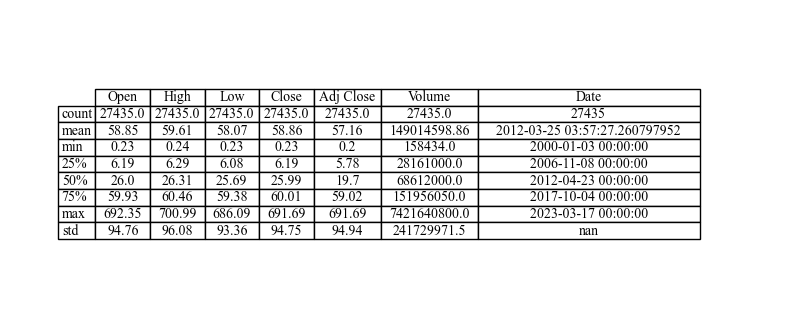

In [232]:
## understanding basic information about the data
# data.describe()
desc_table = data.describe()

# Convert the table into a Matplotlib figure
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust size as needed
ax.axis('off')  # Turn off the axis
ax.axis('tight')  # Adjust layout to fit table

# Create the table in the figure
table = ax.table(cellText=desc_table.round(2).values, 
                 colLabels=desc_table.columns, 
                 rowLabels=desc_table.index, 
                 cellLoc='center', 
                 loc='center')

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(desc_table.columns))))

# Save the figure
plt.savefig('data_describe_table.svg', format = 'svg', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
## checking to see if there are any missing values in the dataset
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
Company      0
dtype: int64


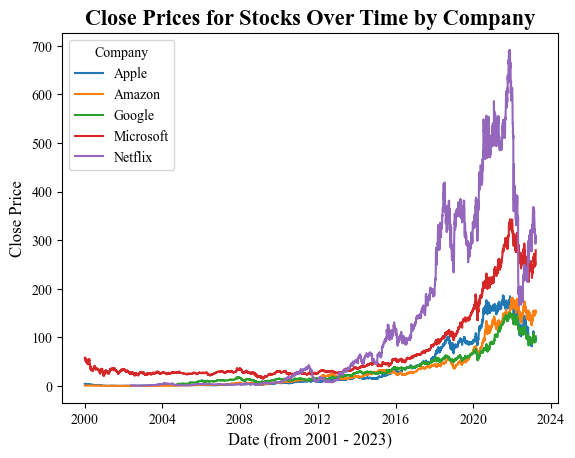

In [135]:
## creating a time-series plot to visualize the data
## ensuring 'Date' is datetime for time-series
data['Date'] = pd.to_datetime(data['Date'])

sns.lineplot(data = data, x = 'Date', y = 'Close', hue = 'Company', palette = 'tab10')
plt.title('Close Prices for Stocks Over Time by Company', fontsize = 16, fontweight = 'bold')
plt.xlabel('Date (from 2001 - 2023)', fontsize = 12)
plt.ylabel('Close Price', fontsize = 12)
plt.legend(title = 'Company')
plt.savefig('Close Prices Over Time.svg', format = 'svg')
plt.show()

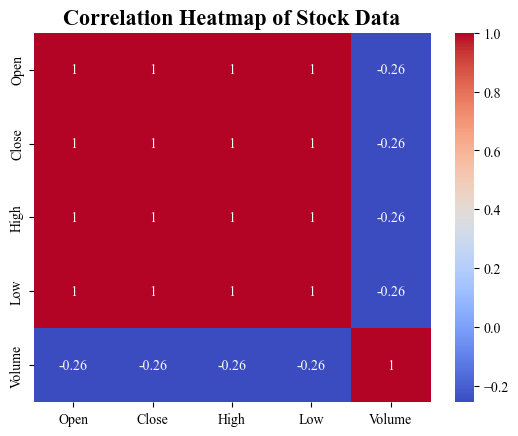

In [141]:
## creating a correlation matrix to determine the relationship between the numeric variables
correlation = data[['Open', 'Close', 'High', 'Low', 'Volume']].corr()

# Heatmap
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of Stock Data', fontsize = 16, fontweight = 'bold')
plt.savefig('Correlation Heatmap of Stock Data')
plt.show()

The correlation matrix above indicates that there is a strong positive linear relationship between open stock prices, close stock prices, the highest stock price, and the lowest stock price of a given day, and it also indicates that there is a negative correlation between stock volume and these variables. Given that most of the correlation matrix displays '1', this means that there is a perfect positive correlation between variables, meaning that as one variable increases, the other also increases proportionally. 

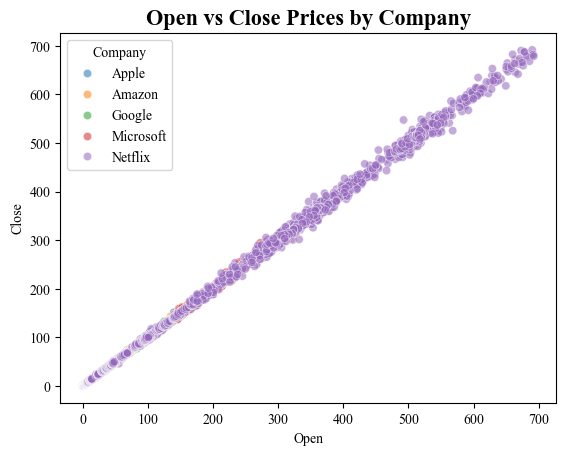

In [147]:
## checking relationships visually
sns.scatterplot(x = 'Open', y = 'Close', data = data, hue = 'Company', palette = 'tab10', alpha = 0.55)
plt.title('Open vs Close Prices by Company', fontsize = 16, fontweight = 'bold')
plt.legend(title = 'Company')
plt.savefig('Open vs Close Prices by Company.svg', format = 'svg')
plt.show()

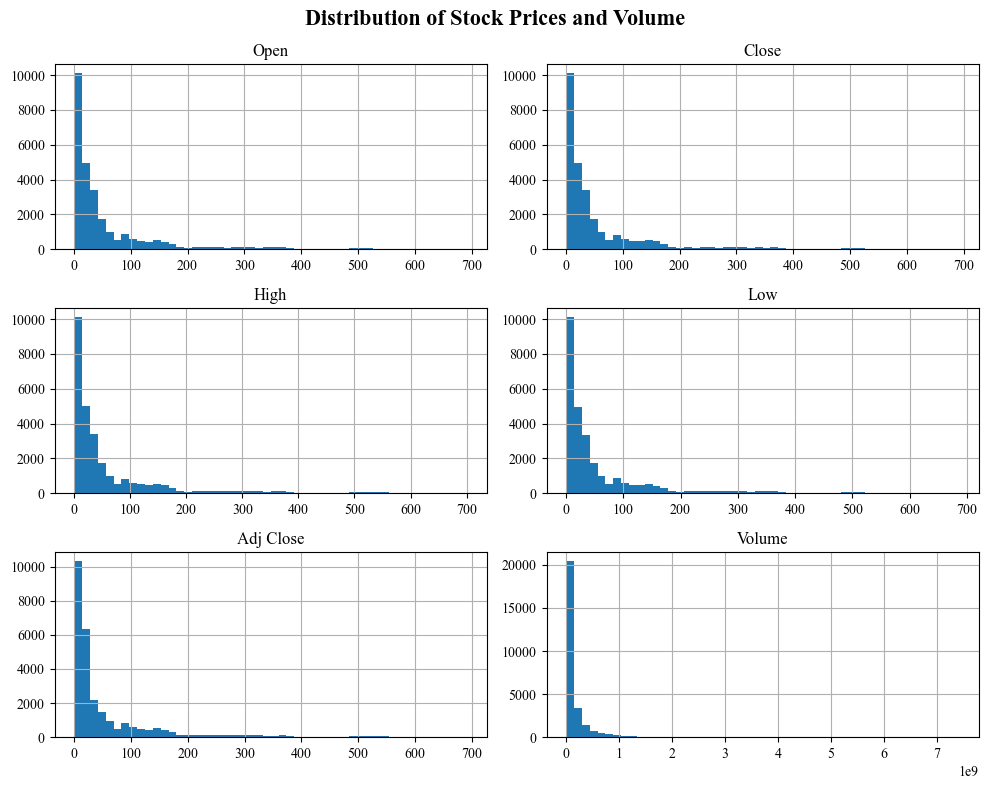

In [167]:
# Plot histograms for stock prices and volume
data[['Open', 'Close', 'High', 'Low', 'Adj Close', 'Volume']].hist(bins = 50, figsize = (10, 8))
plt.suptitle('Distribution of Stock Prices and Volume', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()

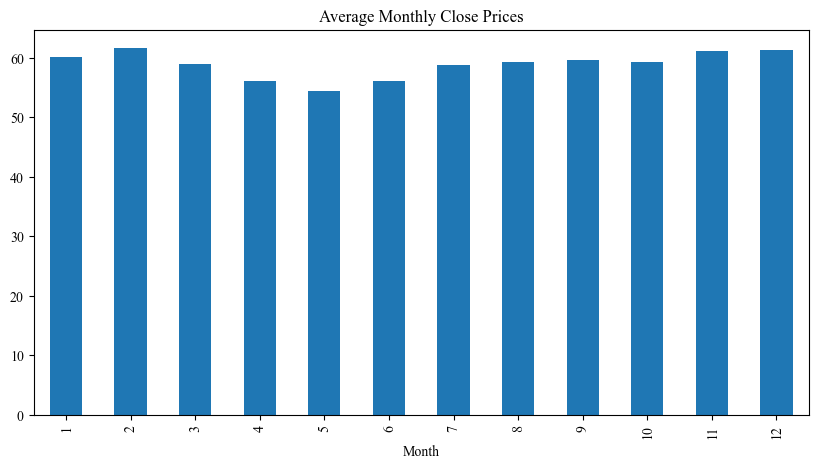

In [55]:
## seasonality and trends by month
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Average Close Price by Month
monthly_avg = data.groupby('Month')['Close'].mean()
monthly_avg.plot(kind = 'bar', title = 'Average Monthly Close Prices', figsize = (10, 5))
plt.show()

In [58]:
data['Z_Score_Close'] = zscore(data['Close'])
outliers = data[data['Z_Score_Close'].abs() > 3]
print(outliers)

             Open        High         Low       Close   Adj Close    Volume  \
21862  342.640015  345.100006  342.200012  343.109985  339.075562  21963400   
26222  329.040009  345.000000  328.089996  344.720001  344.720001  10049100   
26223  344.339996  354.000000  341.119995  349.290009  349.290009  14758600   
26224  349.899994  354.359985  348.829987  351.290009  351.290009   7817400   
26225  351.500000  356.100006  346.709991  349.730011  349.730011   9717900   
...           ...         ...         ...         ...         ...       ...   
27411  349.500000  359.700012  344.250000  358.570007  358.570007   7134400   
27412  357.549988  363.750000  353.399994  359.959991  359.959991   4624800   
27413  356.630005  362.880005  354.239990  361.420013  361.420013   3966000   
27414  355.000000  361.500000  350.309998  350.709991  350.709991   5215700   
27415  347.910004  349.000000  342.440002  347.959991  347.959991   5294700   

            Date    Company       MA_20       MA_50

# Part 3: Creating a RNN model using LSTM to predict stock market prices

In this section of my project, I am building a Recurrent Neural Network (RNN) using Long Short-Term Memory (LSTM) to make predictions on stock market prices based on historical data. 

In [61]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)

# Focus on the Close price
data2 = data['Close'].values.reshape(-1, 1)

In [63]:
## normalizing the data because LSTM performs better when the data is scaled
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(data2)

In [206]:
## splitting the data into train-test split with 70 percent of the data for training, and remaining 30 percent for testing
def create_sequences(data2, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data2) - sequence_length): 
        sequences.append(data2[i:i + sequence_length])
        labels.append(data2[i + sequence_length])
    return np.array(sequences), np.array(labels)

## setting sequence length (the number of time stamps in each input sequence)
sequence_length = 90

## train-test split
train_size = int(len(scaled_data) * 0.70)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - sequence_length:]

## creating sequences
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

In [208]:
## confirming that x_train and x_test are the right size (they're supposed to be 3D)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (19114, 90, 1)
x_test shape: (8231, 90, 1)
y_train shape: (19114, 1)
y_test shape: (8231, 1)


In [210]:
## building the LSTM model
model = Sequential()

# Use Input layer to define the shape
model.add(Input(shape = (90, 1)))

## adding layers
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

# Add Dense output layer
model.add(Dense(units = 1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 90, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [212]:
## training the model
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - loss: 2.7293e-04 - val_loss: 0.0012
Epoch 2/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - loss: 5.5807e-05 - val_loss: 8.3301e-04
Epoch 3/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - loss: 5.3968e-05 - val_loss: 6.4497e-04
Epoch 4/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 4.7967e-05 - val_loss: 3.2527e-04
Epoch 5/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - loss: 4.8580e-05 - val_loss: 2.1142e-04
Epoch 6/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - loss: 4.1733e-05 - val_loss: 1.6187e-04
Epoch 7/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - loss: 4.4201e-05 - val_loss: 4.0558e-04
Epoch 8/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 5.2834e-05 - val_loss: 1.6420e-04
Epoch 9/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - loss: 4.7013e-05 - val_loss: 1.8885e-04
Epoch 10/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - loss: 4.1650e-05 - val_loss: 2.1440e-04
Epoch 11/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 22

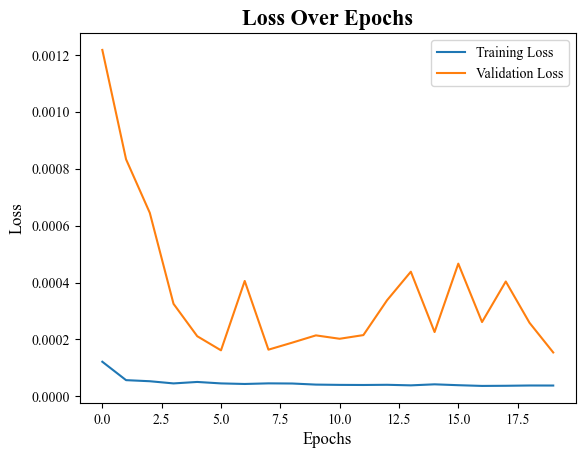

In [214]:
## evaluating the model's performance
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss Over Epochs', fontsize = 16, fontweight = 'bold')
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.legend()
plt.savefig('Loss Over Epochs.svg', format = 'svg')
plt.show()

In [216]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor = 'val_loss',  # Monitor validation loss
    patience = 5,          # Number of epochs with no improvement before stopping
    restore_best_weights = True  # Revert to the best weights
)

# Train the model with early stopping
history2 = model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data = (x_test, y_test), callbacks = [early_stopping], verbose = 1)

Epoch 1/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 3.6899e-05 - val_loss: 1.4732e-04
Epoch 2/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - loss: 3.2558e-05 - val_loss: 3.8429e-04
Epoch 3/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - loss: 3.6776e-05 - val_loss: 4.8895e-04
Epoch 4/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - loss: 3.5091e-05 - val_loss: 8.1782e-04
Epoch 5/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - loss: 3.4543e-05 - val_loss: 3.8878e-04
Epoch 6/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - loss: 3.1644e-05 - val_loss: 4.1845e-04


In [220]:
predicted_prices = model.predict(x_test)

# Inverse transform to get actual prices
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


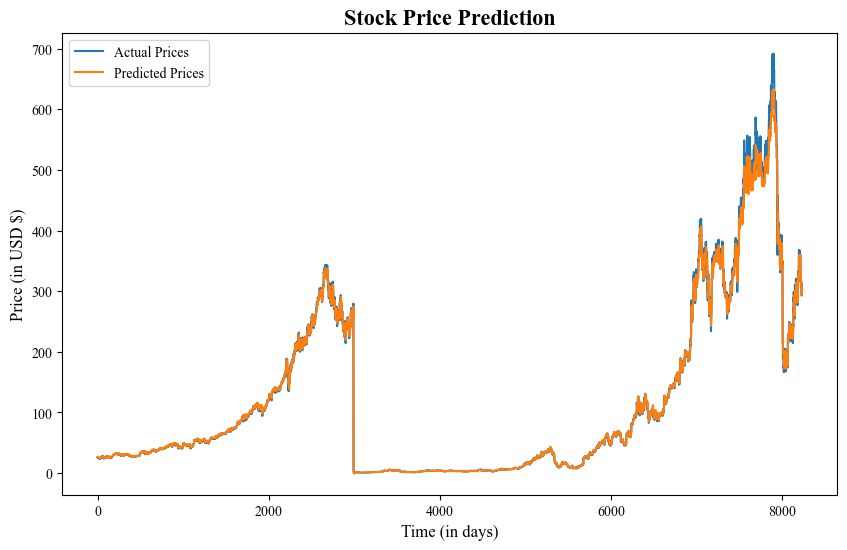

In [222]:
plt.figure(figsize = (10, 6))
plt.plot(actual_prices, label = 'Actual Prices')
plt.plot(predicted_prices, label = 'Predicted Prices')
plt.title('Stock Price Prediction', fontsize = 16, fontweight = 'bold')
plt.xlabel('Time (in days)', fontsize = 12)
plt.ylabel('Price (in USD $)', fontsize = 12)
plt.legend()
plt.savefig('Stock Price Prediction.svg', format = 'svg')
plt.show()

In [224]:
## Computing MAE
mae = mean_absolute_error(actual_prices, predicted_prices)

## Computing MSE
mse = mean_squared_error(actual_prices, predicted_prices)

## Computing RMSE
rmse = np.sqrt(mse)

## Computing R-squared
r2 = r2_score(actual_prices, predicted_prices)

# Print results
print(f"The Mean Absolute Error (MAE) for the LSTM model is: {mae:.2f}")
print(f"The Mean Squared Error (MSE) for the LSTM model is: {mse:.2f}")
print(f"The Root Mean Squared Error (RMSE) for the LSTM model is: {rmse:.2f}")
print(f"The R² value for the LSTM model is: {r2:.2f}")

The Mean Absolute Error (MAE) for the LSTM model is: 3.13
The Mean Squared Error (MSE) for the LSTM model is: 70.44
The Root Mean Squared Error (RMSE) for the LSTM model is: 8.39
The R² value for the LSTM model is: 1.00


In [226]:
def calculate_mape(y_actual, y_predicted):
    y_actual, y_predicted = np.array(y_actual), np.array(y_predicted)
    return np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100

mape = calculate_mape(actual_prices, predicted_prices)
accuracy = 100 - mape  # Accuracy as (100% - MAPE)
print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

MAPE: 7.45%
Accuracy: 92.55%
